In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 读取数据
df = pd.read_excel('study.xlsx', sheet_name='Sheet1')

# 数据概览
print(f"数据集形状: {df.shape}")
print("\n前5行数据:")
print(df.head())
print("\n数据描述统计:")
print(df.describe())

数据集形状: (499, 31)

前5行数据:
   student_id  age  gender             major  study_hours_per_day  \
0      100000   26    Male  Computer Science             7.645367   
1      100001   28    Male              Arts             5.700000   
2      100002   17    Male              Arts             2.400000   
3      100003   27   Other        Psychology             3.400000   
4      100004   25  Female          Business             4.700000   

   social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0                 3.0            0.1           Yes                   70.3   
1                 0.5            0.4            No                   88.4   
2                 4.2            0.7            No                   82.1   
3                 4.6            2.3           Yes                   79.3   
4                 0.8            2.7           Yes                   62.9   

   sleep_hours  ... screen_time  study_environment access_to_tutoring  \
0          6.2  ...     


缺失值统计:
student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_sty

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

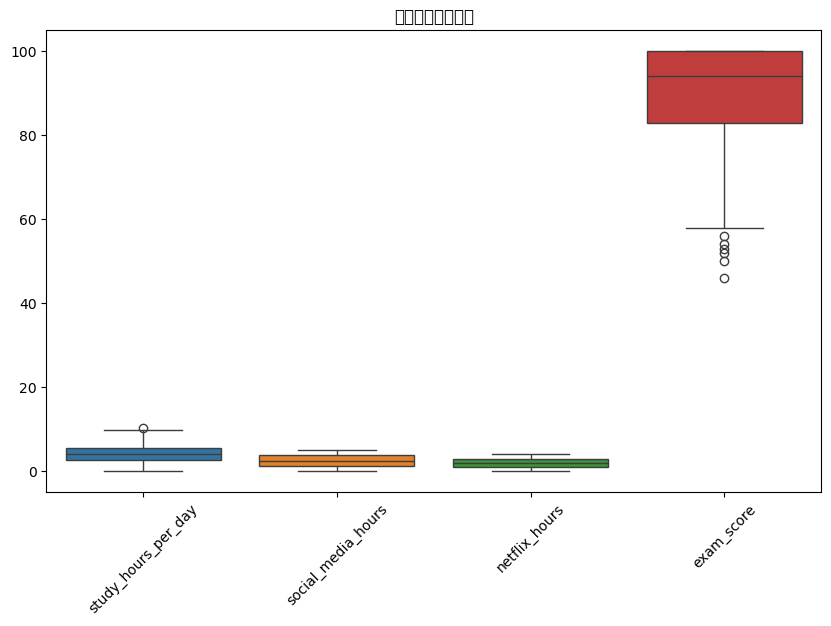

In [2]:
# 检查缺失值
print("\n缺失值统计:")
print(df.isnull().sum())

# 处理缺失值 (本数据集无缺失值)
# df = df.dropna()  # 如果有缺失值可以删除或填充

# 转换分类变量
categorical_cols = ['gender', 'major', 'part_time_job', 'diet_quality', 
                   'parental_education_level', 'internet_quality', 
                   'extracurricular_participation', 'dropout_risk', 
                   'study_environment', 'access_to_tutoring', 
                   'family_income_range', 'learning_style']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# 检查异常值
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['study_hours_per_day', 'social_media_hours', 
                    'netflix_hours', 'exam_score']])
plt.title('关键变量的箱线图')
plt.xticks(rotation=45)
plt.show()

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

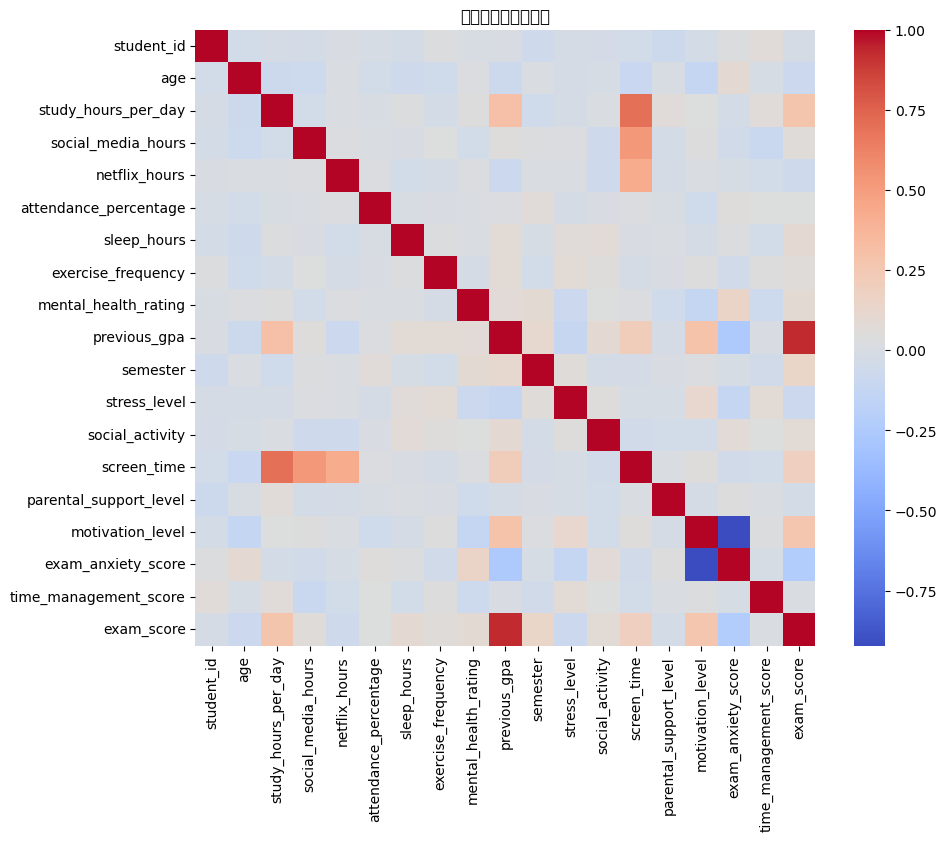


与考试成绩相关性最高的10个变量:
exam_score              1.000000
previous_gpa            0.932358
study_hours_per_day     0.276172
motivation_level        0.270339
screen_time             0.195589
semester                0.142983
sleep_hours             0.095435
mental_health_rating    0.091854
social_activity         0.080409
social_media_hours      0.058408
Name: exam_score, dtype: float64


In [3]:
# 计算数值变量与考试成绩的相关性
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = df[numeric_cols].corr()['exam_score'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title('数值变量相关性热图')
plt.show()

# 显示与考试成绩相关性最高的10个变量
print("\n与考试成绩相关性最高的10个变量:")
print(correlation.head(10))

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32771 (\N{CJK UNIFIED IDEOGRAPH-8003}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32489 (\N{CJK UNIFIED IDEOGRAPH-7EE9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

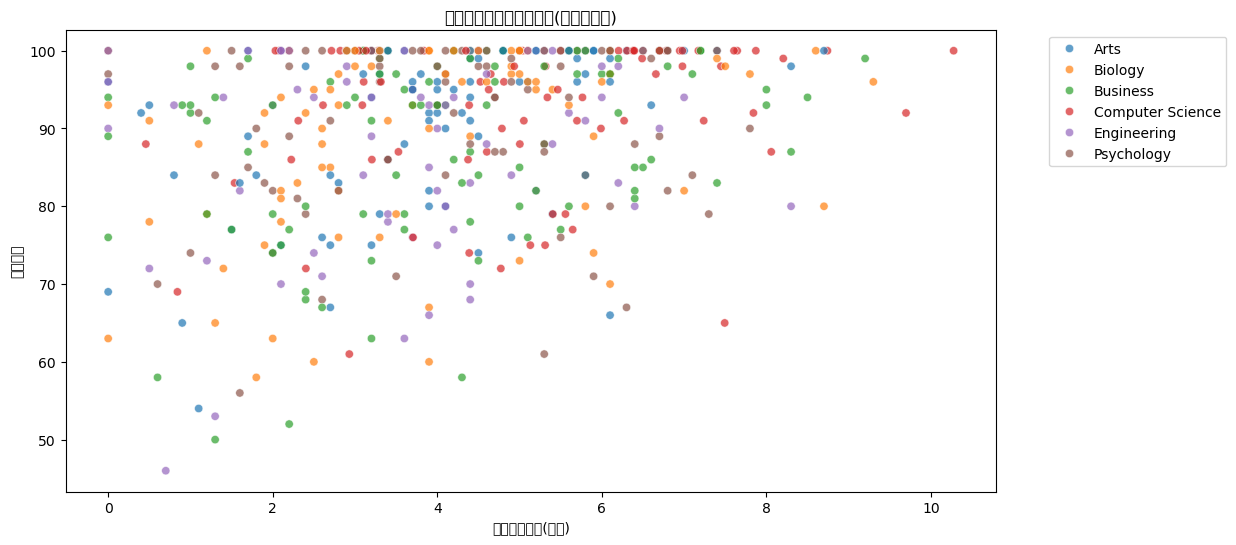

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32771 (\N{CJK UNIFIED IDEOGRAPH-8003}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32489 (\N{CJK UNIFIED IDEOGRAPH-7EE9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

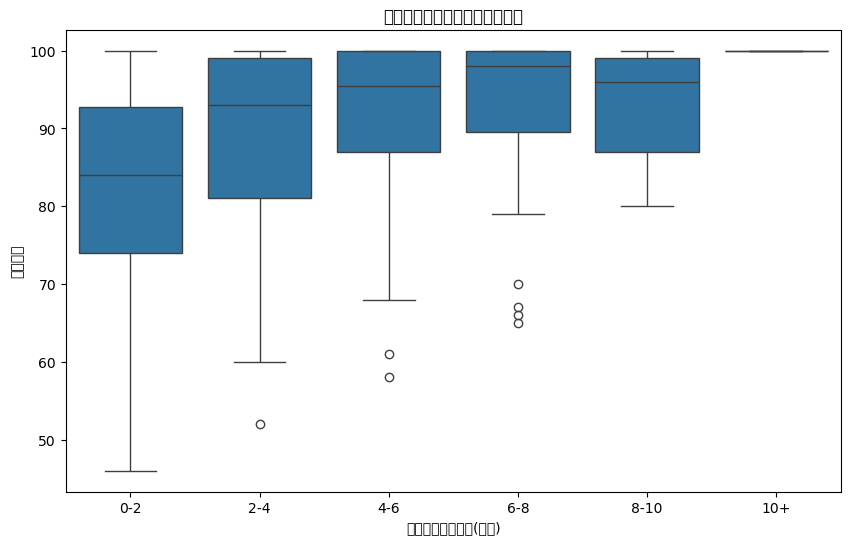

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, 
                hue='major', alpha=0.7)
plt.title('学习时间与考试成绩关系(按专业分类)')
plt.xlabel('每日学习时间(小时)')
plt.ylabel('考试成绩')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 按学习时间分组分析
df['study_hours_group'] = pd.cut(df['study_hours_per_day'], 
                                bins=[0, 2, 4, 6, 8, 10, 12],
                                labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='study_hours_group', y='exam_score', data=df)
plt.title('不同学习时间组的考试成绩分布')
plt.xlabel('每日学习时间分组(小时)')
plt.ylabel('考试成绩')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\125856874.py:9: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\125856874.py:9: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\125856874.py:9: UserWarning: Glyph 23186 (\N{CJK UNIFIED IDEOGRAPH-5A92}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\125856874.py:9: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\125856874.py:9: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1258568

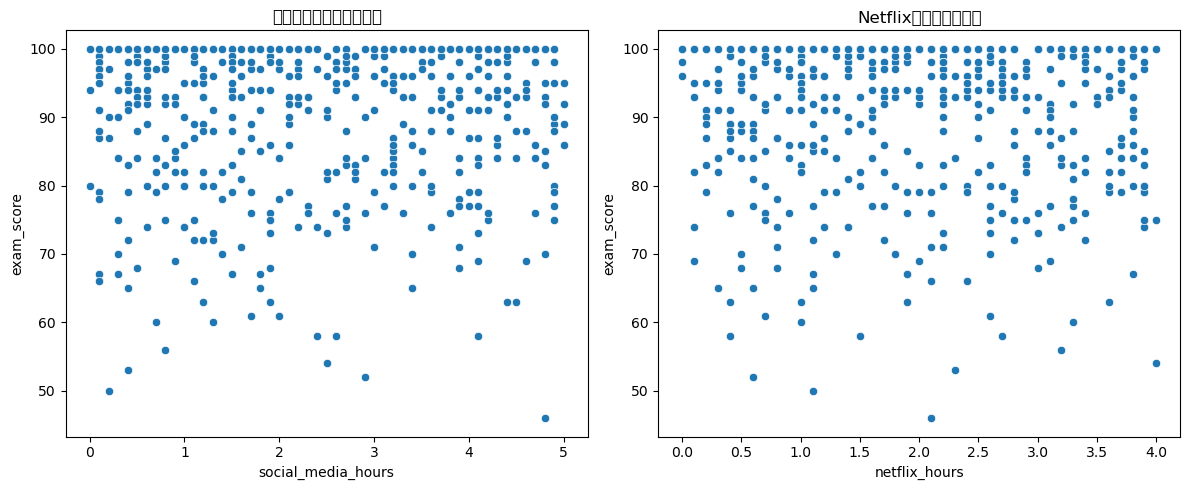


社交媒体时间与考试成绩的相关系数: 0.058
Netflix时间与考试成绩的相关系数: -0.059


In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('社交媒体时间与考试成绩')

plt.subplot(1, 2, 2)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Netflix时间与考试成绩')
plt.tight_layout()
plt.show()

# 计算相关系数
print(f"\n社交媒体时间与考试成绩的相关系数: {df['social_media_hours'].corr(df['exam_score']):.3f}")
print(f"Netflix时间与考试成绩的相关系数: {df['netflix_hours'].corr(df['exam_score']):.3f}")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\661561981.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df.groupby('study_environment')['exam_score'].median().sort_values(ascending=False).index)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-pa

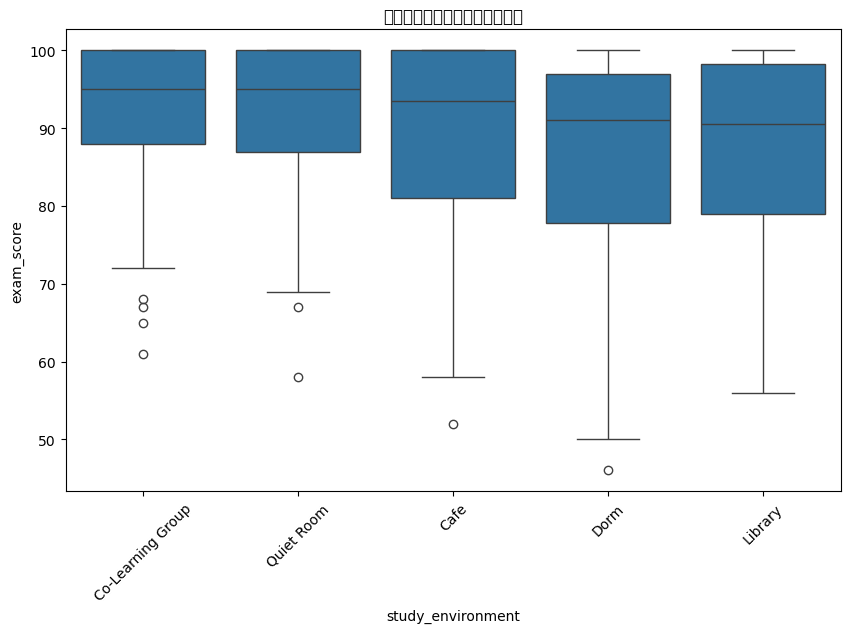


不同学习环境下的平均考试成绩:
study_environment
Co-Learning Group    92.291667
Quiet Room           91.582524
Cafe                 89.518519
Library              87.702381
Dorm                 86.345238
Name: exam_score, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\661561981.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('study_environment')['exam_score'].mean().sort_values(ascending=False))


In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='study_environment', y='exam_score', data=df, 
            order=df.groupby('study_environment')['exam_score'].median().sort_values(ascending=False).index)
plt.title('不同学习环境下的考试成绩分布')
plt.xticks(rotation=45)
plt.show()

# 分组统计
print("\n不同学习环境下的平均考试成绩:")
print(df.groupby('study_environment')['exam_score'].mean().sort_values(ascending=False))

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

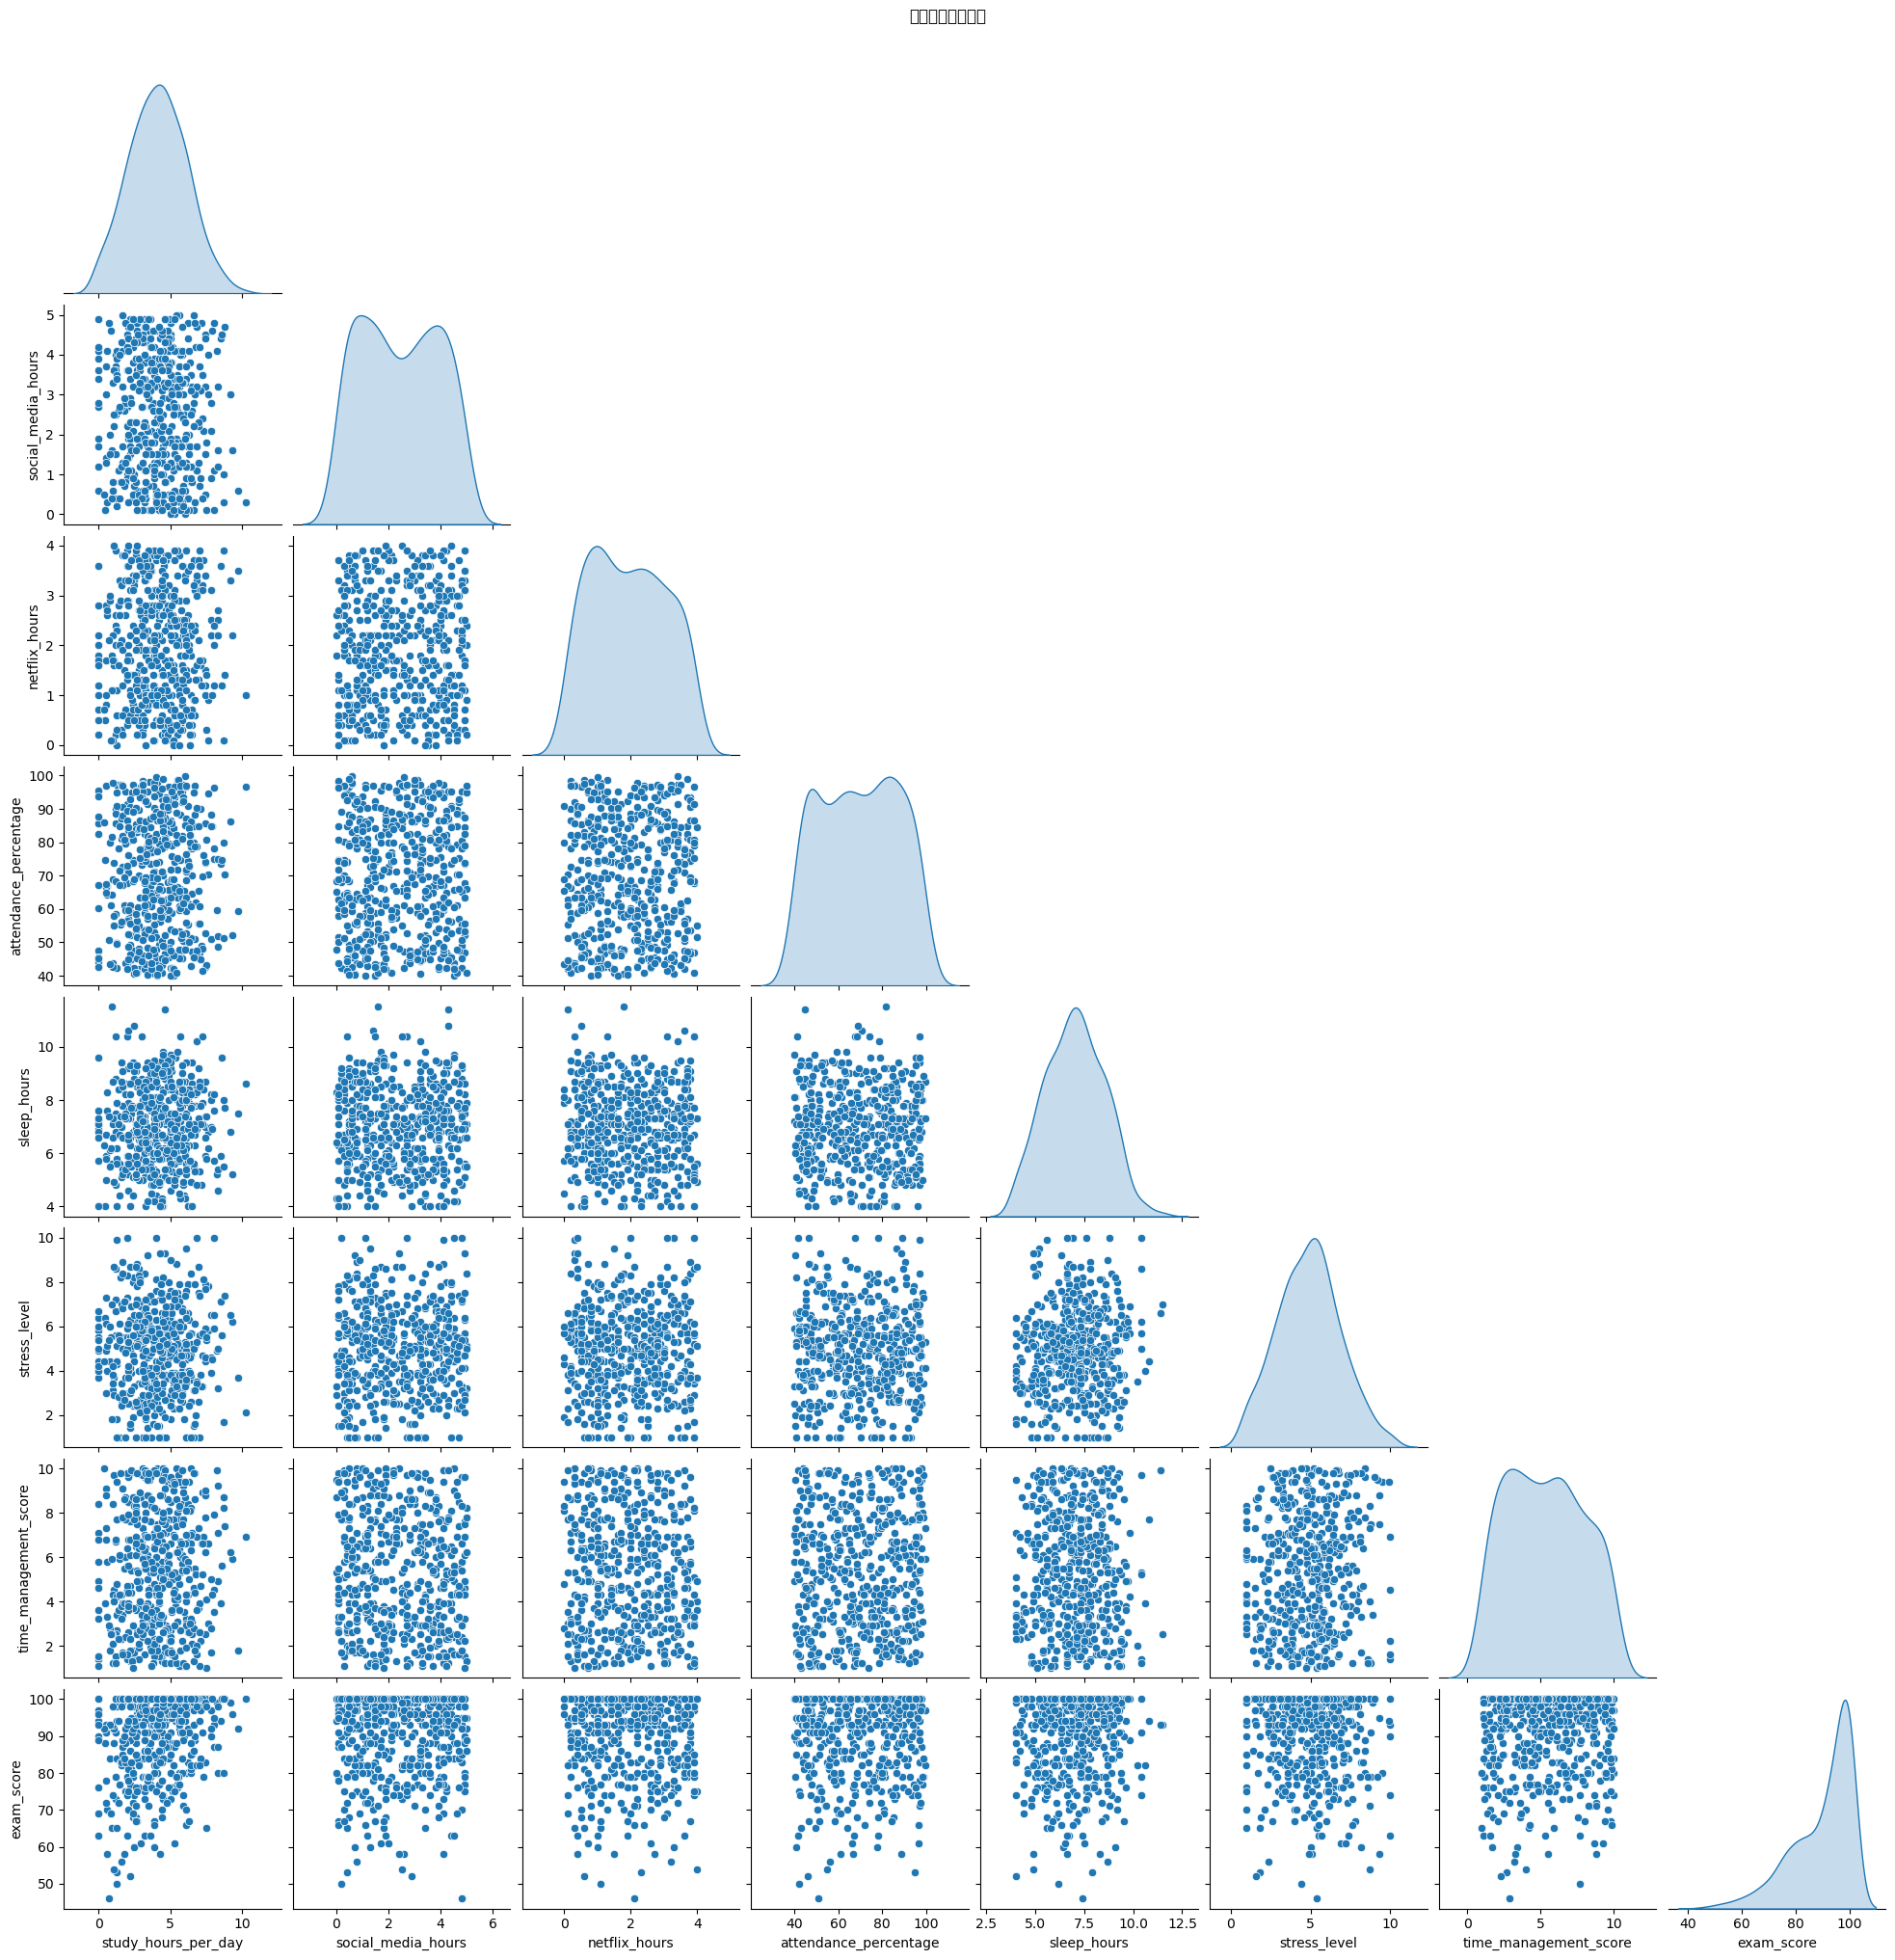


多元回归分析结果:
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8.476
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           9.01e-09
Time:                        19:29:34   Log-Likelihood:                -1887.1
No. Observations:                 499   AIC:                             3788.
Df Residuals:                     492   BIC:                             3818.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const              

In [7]:
# 选择关键变量进行多因素分析
key_vars = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
            'attendance_percentage', 'sleep_hours', 'stress_level',
            'time_management_score', 'exam_score']

sns.pairplot(df[key_vars], diag_kind='kde', corner=True)
plt.suptitle('关键变量关系矩阵', y=1.02)
plt.show()

# 多元线性回归分析
import statsmodels.api as sm

X = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours',
        'attendance_percentage', 'sleep_hours', 'time_management_score']]
X = sm.add_constant(X)  # 添加截距项
y = df['exam_score']

model = sm.OLS(y, X).fit()
print("\n多元回归分析结果:")
print(model.summary())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\832370207.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df.groupby('major')['exam_score'].median().sort_values(ascending=False).index)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPyth

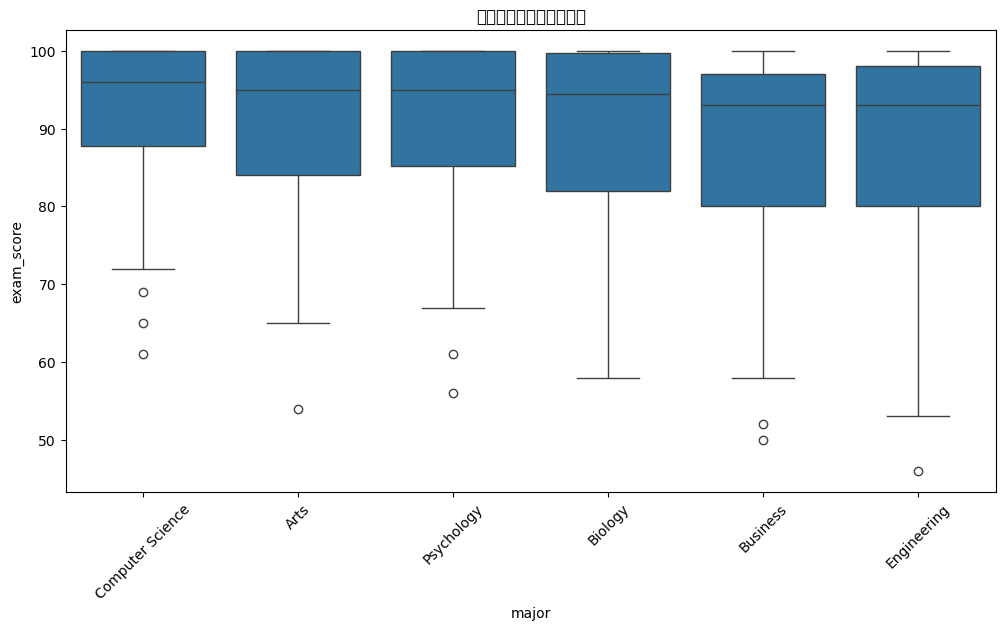


Computer Science和Business的考试成绩有显著差异(p=0.0096)

Computer Science和Engineering的考试成绩有显著差异(p=0.0267)


In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='major', y='exam_score', data=df, 
            order=df.groupby('major')['exam_score'].median().sort_values(ascending=False).index)
plt.title('不同专业的考试成绩分布')
plt.xticks(rotation=45)
plt.show()

# 专业间差异的统计检验
majors = df['major'].unique()
for i in range(len(majors)):
    for j in range(i+1, len(majors)):
        major1 = majors[i]
        major2 = majors[j]
        t_stat, p_val = stats.ttest_ind(
            df[df['major']==major1]['exam_score'],
            df[df['major']==major2]['exam_score'],
            equal_var=False
        )
        if p_val < 0.05:
            print(f"\n{major1}和{major2}的考试成绩有显著差异(p={p_val:.4f})")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1009796497.py:10: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1009796497.py:10: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1009796497.py:10: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1009796497.py:10: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17592\1009796497.py:10: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_175

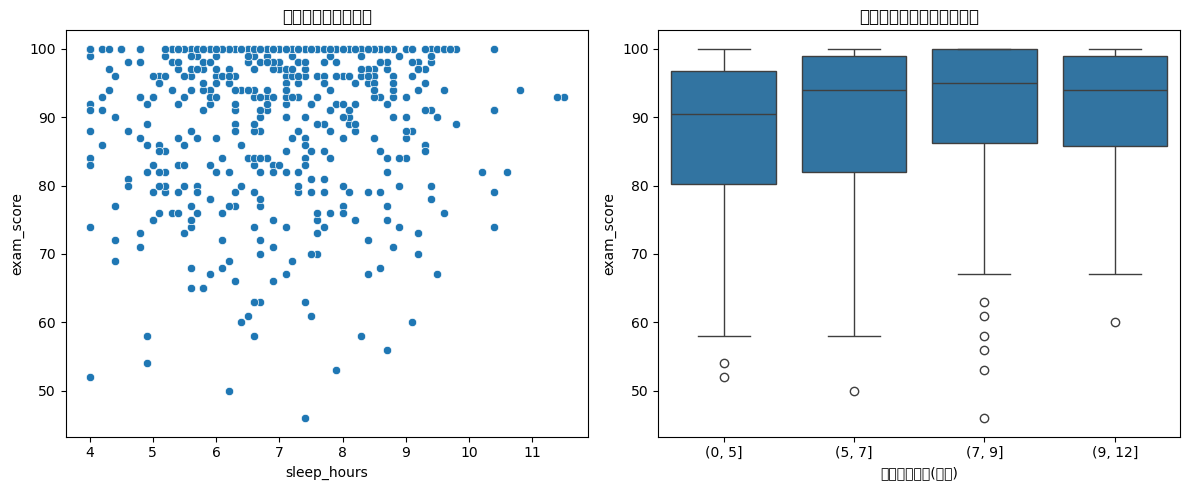

D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ano\Lib\site-packages\IPython\core\pylabto

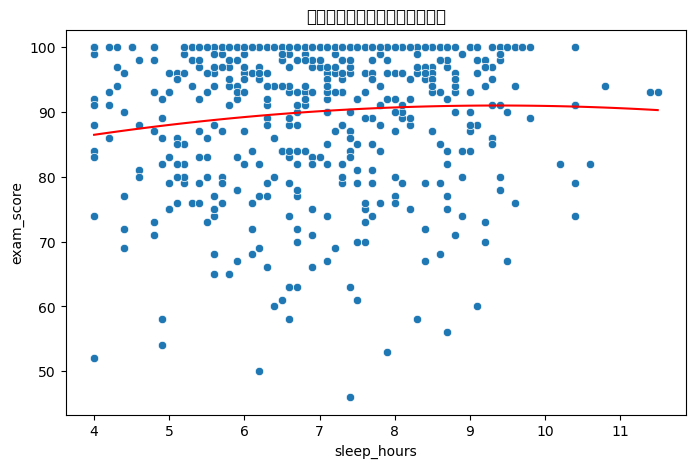

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.title('睡眠时间与考试成绩')

plt.subplot(1, 2, 2)
sns.boxplot(x=pd.cut(df['sleep_hours'], bins=[0, 5, 7, 9, 12]), y='exam_score', data=df)
plt.title('不同睡眠时间组的考试成绩')
plt.xlabel('睡眠时间分组(小时)')
plt.tight_layout()
plt.show()

# 睡眠时间与考试成绩的曲线拟合
sleep_range = np.linspace(df['sleep_hours'].min(), df['sleep_hours'].max(), 100)
coef = np.polyfit(df['sleep_hours'], df['exam_score'], 2)
poly = np.poly1d(coef)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.plot(sleep_range, poly(sleep_range), color='red')
plt.title('睡眠时间与考试成绩的二次拟合')
plt.show()